In [29]:
import pandas as pd
from code.utilities import nlp_pipe, ml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

plt.style.use('fivethirtyeight')


In [30]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Read the data using pandas

In [45]:
# n_samples = 100
n_samples = 4_400
# read data
data = pd.read_csv('data/twitter.csv')
neg = data.loc[data['label'] ==0]
pos = data.loc[data['label'] ==1]
data2 = pd.concat([neg[:2200],pos[:2200]])

# remove unsupervised data
# data=data[data.label != 'unsup']
# take a sample from the data as df
df= data2.sample(n_samples, random_state=100)

## Keep text and sentiment and drop the other columns

In [47]:
df = df.drop(['id'], axis=1)
df.columns = ['sentiment', 'review']
# df=df[df.sentiment != 'unsup']
# df.sentiment  = df.sentiment.map({'neg' : 0, 'pos' : 1})


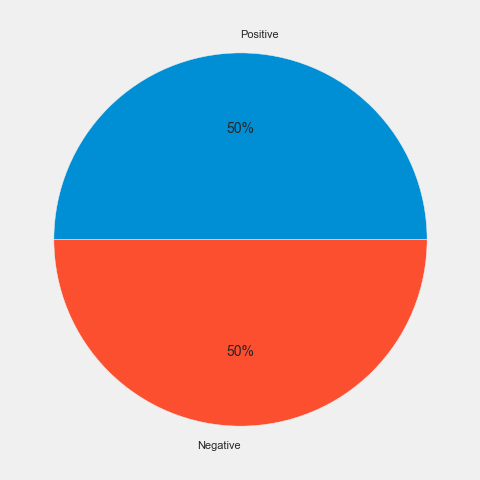

In [48]:
plt.figure(figsize=(8, 8))
plt.pie(df.sentiment.value_counts(), labels=['Positive', 'Negative'], autopct='%.0f%%')
plt.show()

In [49]:
cv = nlp_pipe()
rs = cv.fit_transform(df.review)
new_df = pd.DataFrame(rs.toarray(), columns=cv.vectorizer.get_feature_names()) # TERM DOCUEMNT MATRIX

In [50]:
tv = nlp_pipe(TfidfVectorizer(stop_words='english', max_df=0.75, min_df=.40, max_features=10000, use_idf=False, norm=None))
rs2 = tv.fit_transform(df.review)
new_df2 = pd.DataFrame(rs2.toarray(), columns=tv.vectorizer.get_feature_names()) # TERM DOCUEMNT MATRIX

In [51]:
new_df2.to_numpy()

array([[0.],
       [0.],
       [2.],
       ...,
       [1.],
       [0.],
       [2.]])

In [52]:
num_words=15

vocab = np.array(tv.vectorizer.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in new_df2.to_numpy()])
topics = [' '.join(t) for t in topic_words]

In [53]:
topics

['user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 

In [54]:
pca_6 = PCA(n_components=900)
# pca_6 = PCA(n_components=2000)
pca_6.fit_transform(new_df.T)
np.cumsum(pca_6.explained_variance_ratio_*100)

array([15.42220674, 16.85261132, 18.18220351, 19.01943577, 19.80470703,
       20.53179577, 21.23169408, 21.85951281, 22.43906635, 22.96780523,
       23.44918647, 23.92118296, 24.35342315, 24.77060415, 25.17467648,
       25.56972466, 25.94661289, 26.31009331, 26.66263277, 27.01050042,
       27.35123109, 27.68803889, 28.00537392, 28.31003467, 28.61312181,
       28.91349666, 29.21022098, 29.5041878 , 29.78977674, 30.0609226 ,
       30.32828845, 30.59185678, 30.84630853, 31.0923622 , 31.33817258,
       31.57954535, 31.81237046, 32.04344676, 32.27064867, 32.49372136,
       32.71610796, 32.93710683, 33.15622159, 33.37299316, 33.58770349,
       33.79499009, 33.99792516, 34.19806733, 34.39773623, 34.59581119,
       34.79183571, 34.98427017, 35.17392068, 35.36107634, 35.54648764,
       35.73028736, 35.91125376, 36.08980271, 36.26661003, 36.44276873,
       36.61677157, 36.78958729, 36.96084966, 37.12999667, 37.29802156,
       37.46427429, 37.63028251, 37.79565116, 37.95842478, 38.12

In [55]:
# import seaborn as sns
# sns.set()


Text(0, 0.5, 'Explained Variance')

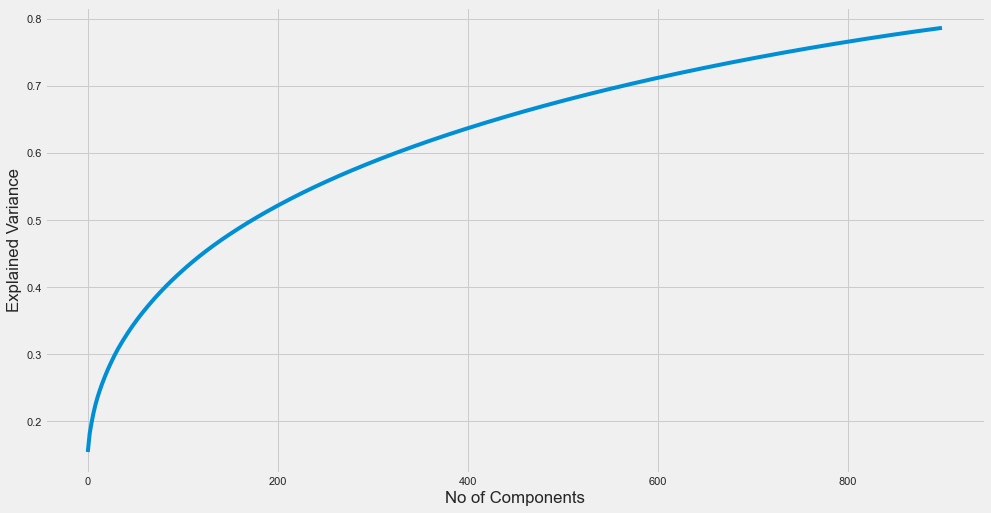

In [56]:
plt.figure(figsize=(15,8))
plt.plot(np.cumsum(pca_6.explained_variance_ratio_))
plt.xlabel('No of Components')
plt.ylabel('Explained Variance')

In [57]:
pca_df = pd.DataFrame(pca_6.components_.T)

In [58]:
pca_df['sentiment'] =df.sentiment.reset_index().sentiment

In [59]:
y = df.sentiment.reset_index().sentiment
x = pd.DataFrame(pca_6.components_.T)
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=123) 

In [61]:
knn = KNeighborsClassifier(n_neighbors = 5)
Log_Reg = LogisticRegression()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()

KNN_3 = KNeighborsClassifier(n_neighbors = 3)

KNN_2 = KNeighborsClassifier(n_neighbors=40)
param_grid = {'n_neighbors': np.arange(1, 50)}
KNN_gscv = GridSearchCV(KNN_2, param_grid, cv=5)



In [62]:
dic = {'KNN_3': KNN_3, 'KNN_5': knn,'KNN_gscv': KNN_gscv,
       'Logistic Regression': Log_Reg, 'DTree': dtree, 'RForest':rf}

machines = ml(dic)
machines.fit(x_train, y_train)
y_predict = machines.predict(x_test)

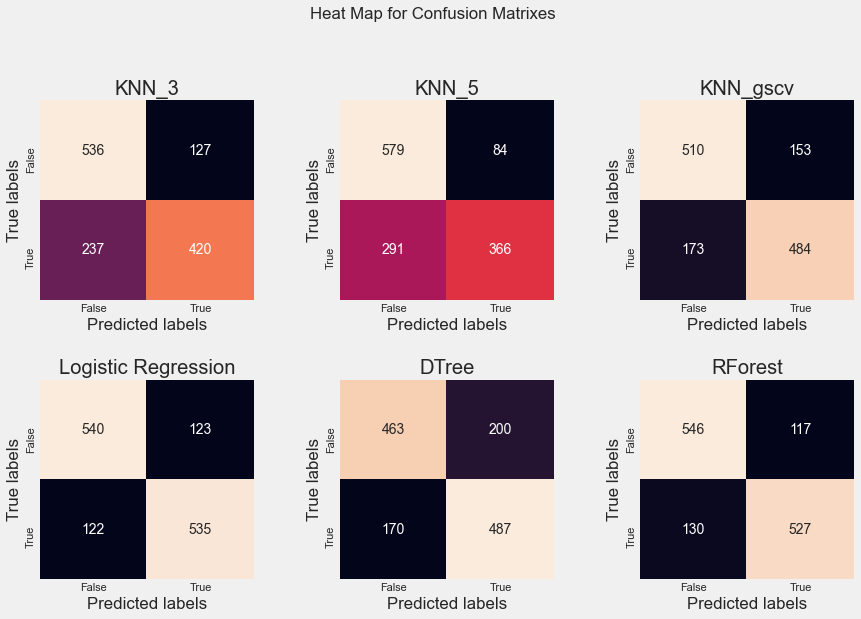

In [63]:
machines.plot_heatmap(y_test, rows=3, columns=3)

In [64]:
machines.get_info()

                         Models Results                         
┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃ Model                ┃ Accuracy ┃ Precision ┃ Recall ┃  F1   ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ KNN_3                │  72.42   │   76.78   │ 63.93  │ 69.77 │
│ KNN_5                │  71.59   │   81.33   │ 55.71  │ 66.12 │
│ KNN_gscv             │   75.3   │   75.98   │ 73.67  │ 74.81 │
│ Logistic Regression  │  81.44   │   81.31   │ 81.43  │ 81.37 │
│ DTree                │  71.97   │   70.89   │ 74.12  │ 72.47 │
│ RForest              │  81.29   │   81.83   │ 80.21  │ 81.01 │
└──────────────────────┴──────────┴───────────┴────────┴───────┘

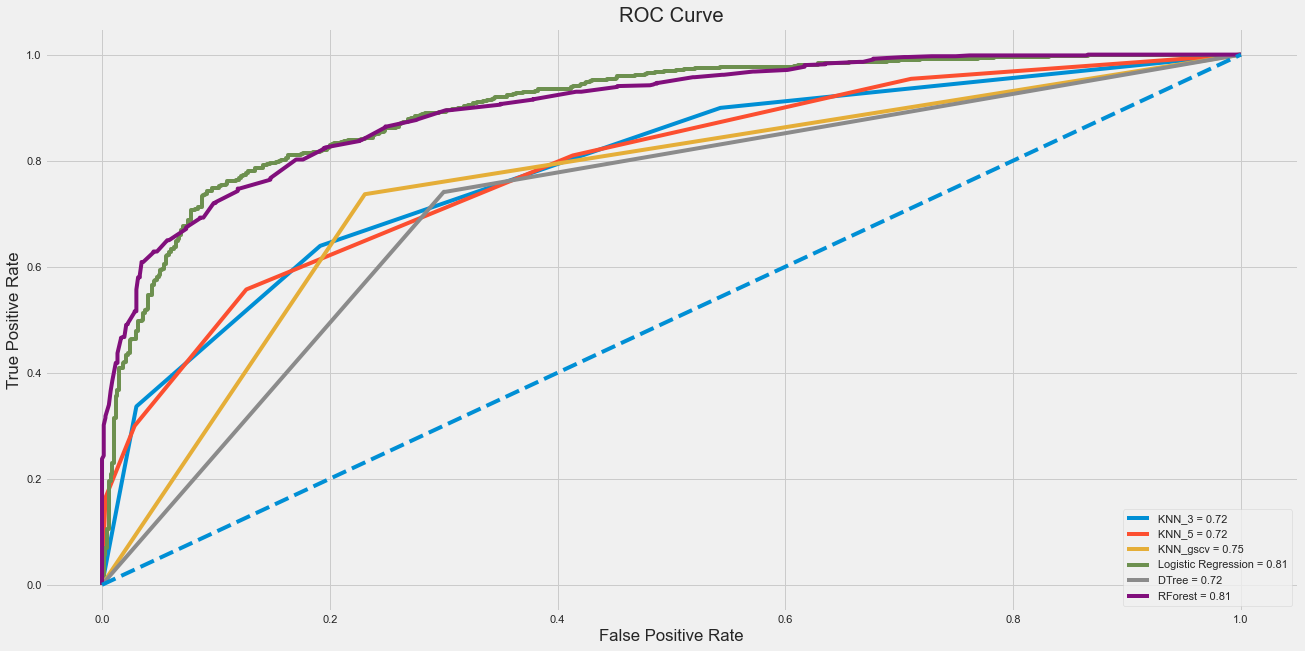

In [65]:
machines.plot_roc()